In [22]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#! pip install seaborn
import seaborn as sns
import math
%matplotlib inline

In [23]:
#reading CSV file and describing the data
train_data_monet=pd.read_csv("monet.csv")
train_data_monet
train_data_monet.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000


C:\Users\Nanda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


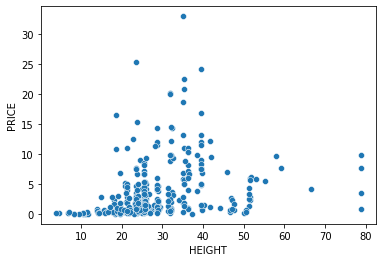

<Figure size 320x320 with 0 Axes>

C:\Users\Nanda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


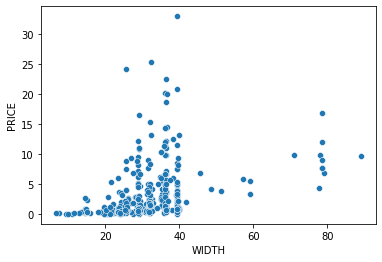

<Figure size 320x320 with 0 Axes>

C:\Users\Nanda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


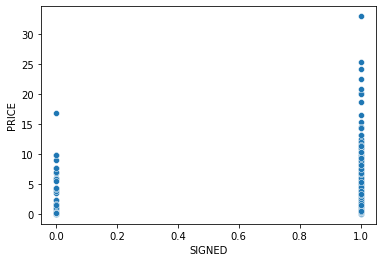

<Figure size 320x320 with 0 Axes>

C:\Users\Nanda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


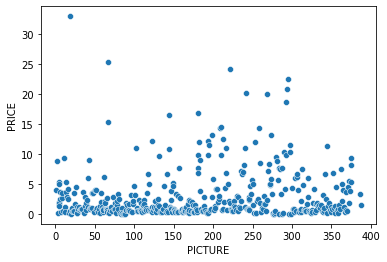

<Figure size 320x320 with 0 Axes>

C:\Users\Nanda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


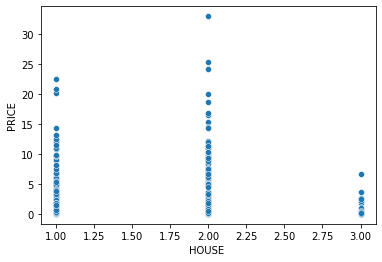

<Figure size 320x320 with 0 Axes>

In [24]:
# Visualising the Scatter plots for all features with respect to Price
x=train_data_monet.drop(["PRICE"], axis=1)
y=train_data_monet.PRICE

%matplotlib inline
for col in x.columns:
    sns.scatterplot(x[col], y)
    plt.figure(figsize=(4, 4), dpi=80)
    plt.show()
    


**Task-1 SIMPLE LINEAR REGRESSION MODEL**

**Model 1: HEIGHT Vs PRICE**

In [25]:
#regression results without splitting the data
a=train_data_monet.HEIGHT
b=train_data_monet.PRICE

import scipy.stats as st

model = st.linregress(a,b)
model

LinregressResult(slope=0.13432083933042452, intercept=-0.6235688584370997, rvalue=0.31458075982450173, pvalue=2.4808426368000058e-11, stderr=0.019591204445870654, intercept_stderr=0.5765501767376701)

C:\Users\Nanda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


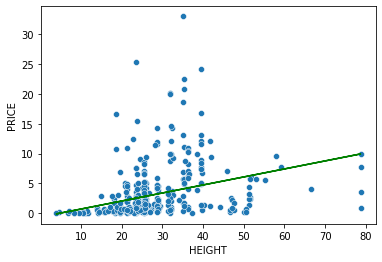

In [26]:
#plotting Height Vs Price scatterplot
a=train_data_monet.HEIGHT
b=train_data_monet.PRICE

sns.scatterplot(a,b)
m, c = np.polyfit(a,b, 1)
plt.plot(a, m*a+c, color='green')

In [27]:
#Classifying the features for train data
X = train_data_monet.drop(['PRICE','SIGNED','HOUSE ','PICTURE','WIDTH'],1)
y = train_data_monet.PRICE

C:\Users\Nanda\AppData\Local\Temp\ipykernel_6840\2862218602.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train_data_monet.drop(['PRICE','SIGNED','HOUSE ','PICTURE','WIDTH'],1)


In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)


In [29]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
#predicting test and train data
train_prediction=lreg.predict(X_train)
price_prediction=lreg.predict(X_test)
print(price_prediction)
print("Regression line intercept=",lreg.intercept_)

[2.74231213 1.38017796 2.93019271 1.95556222 2.74231213 2.55443156
 2.02601744 2.74231213 1.88510701 6.53515125 2.78928228 4.36278209
 4.36278209 2.67185692 2.31958084 3.12981582 2.74231213 2.49571888
 2.74231213 3.4820919  3.89308066 2.7657972  2.50746141 3.4820919
 3.49383443 0.98093174 2.82450988 3.10633075 1.8498794  3.4820919
 2.06124505 3.99876348 3.14155835 3.41163668 2.7305696  4.36278209
 2.7305696  4.03399109 5.76014387 2.04950251 2.23738308 2.53094648
 4.36278209 5.31392751 3.57603218 2.50746141 2.7305696  5.97150952
 2.74231213 2.23738308 4.36278209 1.88510701 2.7305696  2.23738308
 2.04950251 2.55443156 4.36278209 2.7657972  3.10633075 2.04950251
 2.50746141 2.7657972  4.36278209 3.98702094 2.31958084 2.50746141
 2.6014017  2.78928228 2.75405467 2.55443156 2.08473012 1.95556222
 3.4820919  2.23738308 2.19041294 2.50746141 4.26884181 1.86162193
 2.6014017  2.4370062  4.12793138 2.50746141 2.20215548 2.75405467
 2.50746141 3.49383443 2.7305696  3.50557697 2.50746141 3.846110

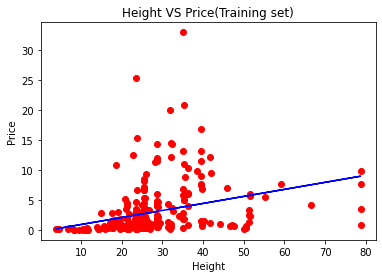

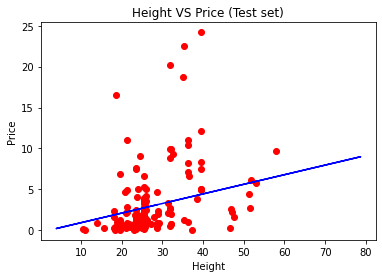

In [30]:
# Visualizing the Training set results
traindata_view= plt
traindata_view.scatter(X_train, y_train, color='red')
traindata_view.plot(X_train, lreg.predict(X_train), color='blue')
traindata_view.title('Height VS Price(Training set)')
traindata_view.xlabel('Height')
traindata_view.ylabel('Price')
traindata_view.show()

# Visualizing the Test set results
testdata_view = plt
testdata_view.scatter(X_test, y_test, color='red')
testdata_view.plot(X_train, lreg.predict(X_train), color='blue')
testdata_view.title('Height VS Price (Test set)')
testdata_view.xlabel('Height')
testdata_view.ylabel('Price')
testdata_view.show()

In [31]:
#finding error values for prediction values of train data
from sklearn import metrics
print("For Train data")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_train,train_prediction))
print("Mean Square Error:", metrics.mean_squared_error(y_train,train_prediction))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(y_train,train_prediction)))
print(" ")
#finding error values for prediction values of test data
print("For Test data")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,price_prediction))
print("Mean Square Error:", metrics.mean_squared_error(y_test,price_prediction))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(y_test,price_prediction)))

For Train data
Mean Absolute Error:  2.565972039597058
Mean Square Error: 16.710824682463528
Root Mean Square Error: 4.087887557463332
 
For Test data
Mean Absolute Error:  2.59651818223108
Mean Square Error: 16.825349691493834
Root Mean Square Error: 4.101871486467346


**Model 2
SIZE Vs PRICE**

In [32]:
#Creating Size feature
train_data_monet['SIZE']=train_data_monet['HEIGHT']*train_data_monet['WIDTH']
train_data_monet

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40
...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,1008.64
426,9.352500,25.9,39.6,1,375,2,1025.64
427,8.252500,25.6,39.6,1,375,1,1013.76
428,3.410000,25.6,39.4,1,386,2,1008.64


C:\Users\Nanda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


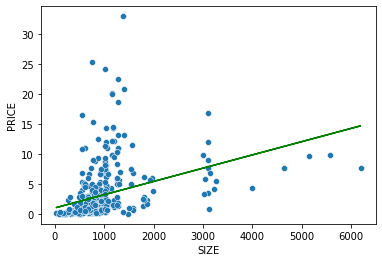

In [33]:
#Plotting Size Vs Price Scatter plot
a=train_data_monet.SIZE
b=train_data_monet.PRICE

sns.scatterplot(a,b)
m, c = np.polyfit(a,b, 1)
plt.plot(a, m*a+c, color='green')

In [34]:
#Splittin features for training data
X = train_data_monet.drop(['PRICE','SIGNED','HOUSE ','PICTURE','WIDTH','HEIGHT'],1)
#print(X)
y = train_data_monet.PRICE
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

C:\Users\Nanda\AppData\Local\Temp\ipykernel_6840\3739603881.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train_data_monet.drop(['PRICE','SIGNED','HOUSE ','PICTURE','WIDTH','HEIGHT'],1)


In [35]:
#performing Linear Regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
#predicting test and train data
train_prediction=lreg.predict(X_train)
price_prediction=lreg.predict(X_test)
print(price_prediction)
print("Regression line intercept=",lreg.intercept_)

[ 2.58855515  2.5627347   2.73385164  2.50547846  3.00504165  3.30533609
  3.00644548  2.23672008  2.42074724  2.5252825   2.99862414  1.86071906
  5.64915684  2.22586546  8.19360004  2.38948694  2.67769841  2.17916302
  2.42626229  1.55829381  3.27994179  3.85165186  2.09282743  2.03963227
  1.52447653  3.2152653   2.59472198  2.42626229  2.20794155  3.16427617
  3.21386147  2.59271651  2.99594182  3.00644548  3.85165186  3.05377463
  2.79183486  2.23975335  2.64084785  3.20398452  3.21178079  8.26098392
  2.99862414  2.58639927  2.05675399  2.66541489  0.74098857  2.45168166
  4.16751377  3.29433106  2.91108527 10.6806366   3.05447655  4.56700389
  2.50748393  3.03993687  1.22859413  2.75465841  3.28713642  2.07141901
  3.29809132  2.56652003  2.75160007  1.88378199  1.34481126  2.50748393
  3.27994179  3.71104317  2.39843636  2.72267113  3.00644548  2.79376513
  3.01145916  2.0660293   1.91699763  8.52756135  2.21862069  2.99862414
  5.19441595  3.25116326  1.6681937   3.20398452 14

In [36]:
#Calculating errors for test data
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,price_prediction))
print("Mean Square Error:", metrics.mean_squared_error(y_test,price_prediction))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(y_test,price_prediction)))

Mean Absolute Error:  2.415087728856605
Mean Square Error: 13.14348335252366
Root Mean Square Error: 3.625394234083193


**Multivariate Linear Regression Model**

In [37]:
#Splittig data
X = train_data_monet.iloc[:, 3:]
y = train_data_monet.iloc[:, 0]
print(X)
print(y)

     SIGNED  PICTURE  HOUSE      SIZE
0         1        1       1   545.28
1         1        2       2   816.64
2         0        3       3   109.71
3         1        4       2   822.40
4         1        4       2   822.40
..      ...      ...     ...      ...
425       1      375       1  1008.64
426       1      375       2  1025.64
427       1      375       1  1013.76
428       1      386       2  1008.64
429       1      387       1   822.40

[430 rows x 4 columns]
0      3.993780
1      8.800000
2      0.131694
3      2.037500
4      1.487500
         ...   
425    5.282500
426    9.352500
427    8.252500
428    3.410000
429    1.542500
Name: PRICE, Length: 430, dtype: float64


In [38]:
#Normalisation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
train_scaled_range = pd.DataFrame(scaler.transform(X_train))
test_scaled_range = pd.DataFrame(scaler.transform(X_test))

In [39]:
train_scaled_range.describe()

,0,1,2,3
count,344.000000,344.000000,344.000000,344.000000
mean,0.819767,0.476465,0.308140,0.146384
std,0.384941,0.282914,0.299841,0.107403
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.230519,0.000000,0.098590
50%,1.000000,0.467532,0.500000,0.128120
75%,1.000000,0.717532,0.500000,0.162598
max,1.000000,1.000000,1.000000,1.000000


In [40]:
test_scaled_range.describe()

,0,1,2,3
count,86.000000,86.000000,86.000000,86.000000
mean,0.825581,0.453156,0.296512,0.155990
std,0.381695,0.286011,0.280524,0.118767
min,0.000000,0.002597,0.000000,0.027380
25%,1.000000,0.206494,0.000000,0.101711
50%,1.000000,0.425974,0.500000,0.129106
75%,1.000000,0.703896,0.500000,0.163837
max,1.000000,1.002597,1.000000,0.831280


In [41]:
#Performing Linear regression and calculating Accuracy
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
r2_score = lreg.score(X_test,y_test)
print("Accuracy=",r2_score*100,'%')
#predicting test and train data
train_prediction=lreg.predict(X_train)
price_prediction=lreg.predict(X_test)
print(price_prediction)
print("Regression line intercept=",lreg.intercept_)

Accuracy= 16.42573089148398 %
[ 3.22076689  1.92754132  2.93806762  1.93775964  3.05523056  2.80093277
  0.10316848  2.97468388 -0.39990482 13.90497251  2.47756957  5.41100907
  4.65693699  3.4924594   2.76191325  3.98381713  3.25262187  2.60286503
  3.12921412  3.91887414  4.88665529  3.63284637  2.77899543  2.74702618
  3.4076096  -0.66956226  2.78576922  3.66585504  2.41448587  3.89836058
  0.49732345  3.61926124  3.78282632  3.56165034  3.2177669   8.76214683
  3.10305923  3.8915362   9.12231881  2.23104022  2.01204425  3.21291415
  4.126748    3.14099513  2.54414237 -0.05058453  2.4798926   6.95658185
  1.02550574  2.83549945  4.27741432  2.26079234  2.60807557  2.52450248
  2.40880346  3.67128036  5.41100907  3.57570548  3.32444862  0.56463023
  3.34887815  0.64080585  3.87509335  4.72698046  0.77186041  2.56320378
  2.17915886  3.76243199  3.47510156  2.92373203  2.41125938  3.02468183
  3.70318853  2.18481792  2.60671987  2.35649155  3.61792469  1.45056921
  2.35755367  2.70714

In [42]:
#finding error values for prediction values of train data
from sklearn import metrics
print("For Train data")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_train,train_prediction))
print("Mean Square Error:", metrics.mean_squared_error(y_train,train_prediction))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(y_train,train_prediction)))
print(" ")
#finding error values for prediction values of test data
print("For Test data")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,price_prediction))
print("Mean Square Error:", metrics.mean_squared_error(y_test,price_prediction))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(y_test,price_prediction)))

For Train data
Mean Absolute Error:  2.3988002538375746
Mean Square Error: 15.463935276461987
Root Mean Square Error: 3.932421045165686
 
For Test data
Mean Absolute Error:  2.501052850884481
Mean Square Error: 15.133083498534884
Root Mean Square Error: 3.8901264116394576
